In [1]:
# Codeblock 1
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [2]:
# Codeblock 2
X, y = make_classification(n_samples=500, n_features=2, n_classes=2, n_informative=2, 
                           n_redundant=0, n_clusters_per_class=1, random_state=100)

In [3]:
# Codeblock 3
print(X[:10])

[[-0.22676663  1.36024137]
 [-0.85187377  0.97606971]
 [-0.79922097  1.78464586]
 [-2.53992882  0.3520336 ]
 [ 0.70146944 -0.82841026]
 [-1.78450717  0.78723526]
 [ 1.11441894 -1.24231414]
 [-1.66229165  1.26714509]
 [ 1.59703978 -1.5697168 ]
 [-0.38722829  1.21757937]]


In [4]:
# Codeblock 4
print(y[:10])

[0 0 0 0 1 0 1 0 1 0]


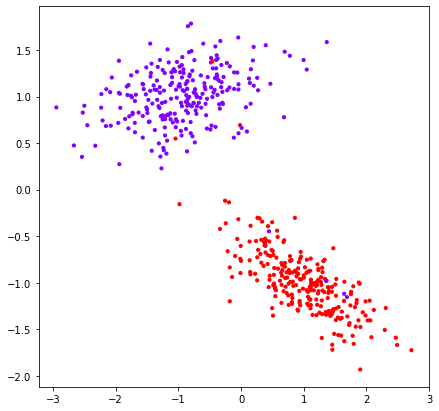

In [5]:
# Codeblock 5
plt.figure(figsize=(7,7))
plt.scatter(X[:,0], X[:,1], c=y, s=10, cmap='rainbow')

In [6]:
# Codeblock 6
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float().reshape(len(y), 1)

In [7]:
# Codeblock 7
print(y[:10])

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.]])


In [8]:
# Codeblock 8
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=999)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

torch.Size([400, 2])
torch.Size([100, 2])
torch.Size([400, 1])
torch.Size([100, 1])


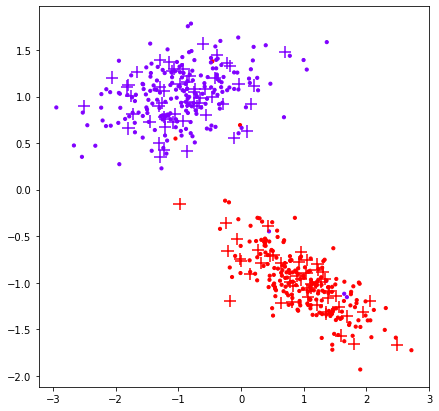

In [9]:
# Codeblock 9
plt.figure(figsize=(7,7))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=10, cmap='rainbow')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, marker='+', s=150, cmap='rainbow')

In [10]:
# Codeblock 10
class Logistic_Regression(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.layer0 = nn.Linear(in_features=num_features, out_features=1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.layer0(x)
        x = self.sigmoid(x)
        return x

In [11]:
# Codeblock 11
model = Logistic_Regression(num_features=2)

In [12]:
# Codeblock 12
! pip install torchinfo
from torchinfo import summary

summary(model, input_size=X_train.shape)

Layer (type:depth-idx)                   Output Shape              Param #
Logistic_Regression                      [400, 1]                  --
├─Linear: 1-1                            [400, 1]                  3
├─Sigmoid: 1-2                           [400, 1]                  --
Total params: 3
Trainable params: 3
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.01

In [13]:
# Codeblock 13
LEARNING_RATE = 0.001
EPOCHS = 4000

In [14]:
# Codeblock 14
loss_function = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)

In [15]:
# Codeblock 15
def calculate_accuracy(preds, actuals):
    
    with torch.no_grad():
        rounded_preds = torch.round(preds)
        num_correct = torch.sum(rounded_preds == actuals)
        accuracy = num_correct/len(preds)
        
    return accuracy

In [16]:
# Codeblock 16
train_losses = []
test_losses  = []
train_accs = []
test_accs  = []

for epoch in range(EPOCHS):
    # Forward propagation (predicting train data) #a
    train_preds = model(X_train)
    train_loss  = loss_function(train_preds, y_train)
    
    # Predicting test data #b
    with torch.no_grad():
        test_preds = model(X_test)
        test_loss  = loss_function(test_preds, y_test)
        
    # Calculate accuracy #c
    train_acc = calculate_accuracy(train_preds, y_train)
    test_acc  = calculate_accuracy(test_preds, y_test)
    
    # Backward propagation #d
    optimizer.zero_grad()
    train_loss.backward()

    # Gradient descent step #e
    optimizer.step()
    
    # Store training history #f
    train_losses.append(train_loss.item())
    test_losses.append(test_loss.item())
    train_accs.append(train_acc.item())
    test_accs.append(test_acc.item())
    
    # Print training data #g
    if epoch%100==0:
        print(f'Epoch: {epoch} \t|' \
            f' Train loss: {np.round(train_loss.item(),3)} \t|' \
            f' Test loss: {np.round(test_loss.item(),3)} \t|' \
            f' Train acc: {np.round(train_acc.item(),2)} \t|' \
            f' Test acc: {np.round(test_acc.item(),2)}')

Epoch: 0 	| Train loss: 0.736 	| Test loss: 0.758 	| Train acc: 0.5 	| Test acc: 0.47
Epoch: 100 	| Train loss: 0.69 	| Test loss: 0.711 	| Train acc: 0.5 	| Test acc: 0.47
Epoch: 200 	| Train loss: 0.649 	| Test loss: 0.668 	| Train acc: 0.5 	| Test acc: 0.47
Epoch: 300 	| Train loss: 0.611 	| Test loss: 0.629 	| Train acc: 0.5 	| Test acc: 0.47
Epoch: 400 	| Train loss: 0.577 	| Test loss: 0.593 	| Train acc: 0.51 	| Test acc: 0.47
Epoch: 500 	| Train loss: 0.546 	| Test loss: 0.561 	| Train acc: 0.53 	| Test acc: 0.49
Epoch: 600 	| Train loss: 0.518 	| Test loss: 0.532 	| Train acc: 0.63 	| Test acc: 0.6
Epoch: 700 	| Train loss: 0.493 	| Test loss: 0.505 	| Train acc: 0.75 	| Test acc: 0.72
Epoch: 800 	| Train loss: 0.47 	| Test loss: 0.48 	| Train acc: 0.86 	| Test acc: 0.83
Epoch: 900 	| Train loss: 0.448 	| Test loss: 0.458 	| Train acc: 0.91 	| Test acc: 0.9
Epoch: 1000 	| Train loss: 0.429 	| Test loss: 0.437 	| Train acc: 0.94 	| Test acc: 0.94
Epoch: 1100 	| Train loss: 0.41

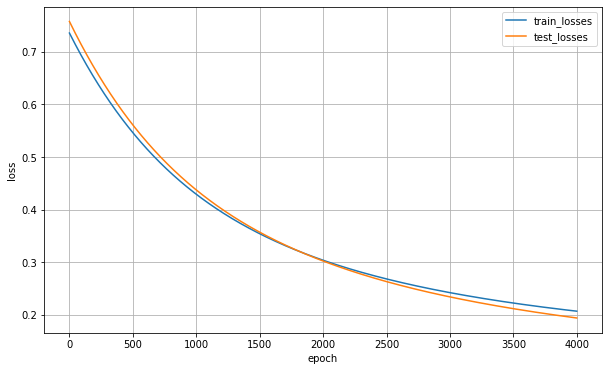

In [17]:
# Codeblock 17
plt.figure(figsize=(10,6))
plt.grid()
plt.plot(train_losses)
plt.plot(test_losses)
plt.legend(['train_losses', 'test_losses'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

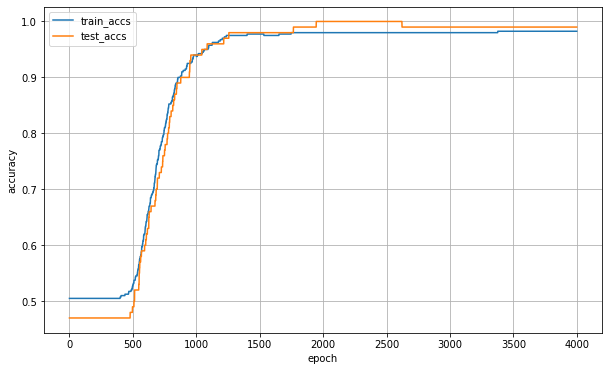

In [18]:
# Codeblock 18
plt.figure(figsize=(10,6))
plt.grid()
plt.plot(train_accs)
plt.plot(test_accs)
plt.legend(['train_accs', 'test_accs'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [19]:
# Codeblock 19
with torch.no_grad():
    param_vector = torch.nn.utils.parameters_to_vector(model.parameters())
    
print(param_vector)

tensor([ 0.7150, -1.1216,  0.3336])


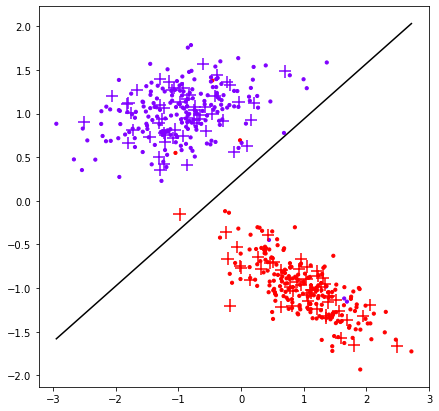

In [20]:
# Codeblock 20
def show_decision_boundary():
    weight_0 = param_vector[0]
    weight_1 = param_vector[1]
    bias = param_vector[2]
    
    #a
    m = -(bias/weight_1) / (bias/weight_0)
    c = -bias/weight_1

    x_line = np.linspace(X_train[:,0].min(), X_train[:,0].max(), 400)
    y_line = m*x_line + c

    plt.figure(figsize=(7,7))
    plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=10, cmap='rainbow')
    plt.scatter(X_test[:,0], X_test[:,1], c=y_test, marker='+', s=150, cmap='rainbow')
    plt.plot(x_line, y_line, c='black')

show_decision_boundary()